In [ ]:
import cv2

In [ ]:
img = cv2.imread('happy.jpg')

In [ ]:
import matplotlib.pyplot as plt

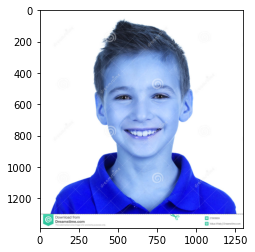

In [ ]:
plt.imshow(img)

In [ ]:
from deepface import DeepFace

ModuleNotFoundError: No module named 'deepface'

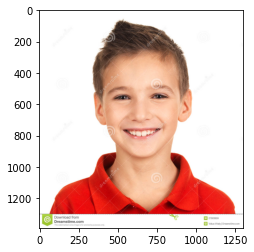

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
from deepface import DeepFace


Directory  C:\Users\mkashifraja /.deepface created
Directory  C:\Users\mkashifraja /.deepface/weights created


In [ ]:
predictions = DeepFace.analyze(img)

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: C:\Users\mkashifraja\.deepface\weights\facial_expression_model_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████| 5.98M/5.98M [00:00<00:00, 28.1MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: C:\Users\mkashifraja\.deepface\weights\age_model_weights.h5
100%|███████████████████████████████████████████████████████████████████████████████| 539M/539M [00:24<00:00, 22.2MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: C:\Users\mkashifraja\.deepface\weights\gender_model_weights.h5
100%|███████████████████████████████████████████████████████████████████████████████| 537M/537M [00:21<00:00, 24.9MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: C:\Users\mkashifraja\.deepface\weights\race_model_single_batch.h5
100%|███████████████████████████████████████████████████████████████████████████████| 537M/537M [00:25<00:00, 20.7MB/s]
Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.26s/it]


In [ ]:
predictions

{'emotion': {'angry': 4.194829292021048e-14,
  'disgust': 9.536293055691795e-19,
  'fear': 7.283714134591758e-14,
  'happy': 100.0,
  'sad': 7.31965283198334e-12,
  'surprise': 1.2050397233342135e-12,
  'neutral': 2.017036493384694e-06},
 'dominant_emotion': 'happy',
 'region': {'x': 320, 'y': 293, 'w': 662, 'h': 662},
 'age': 20,
 'gender': 'Man',
 'race': {'asian': 0.06317862425930798,
  'indian': 0.42793317697942257,
  'black': 0.014695472782477736,
  'white': 61.509060859680176,
  'middle eastern': 21.44344598054886,
  'latino hispanic': 16.541688144207},
 'dominant_race': 'white'}

In [ ]:
predictions['dominant_emotion']

'happy'

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,1.1,4)

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

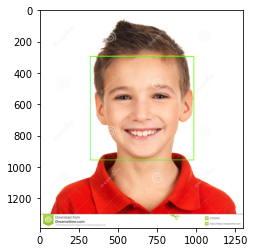

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,
           predictions['dominant_emotion'],
           (0,50),
            font,3,
            (0,0,255),
            2,
            cv2.LINE_4
           );

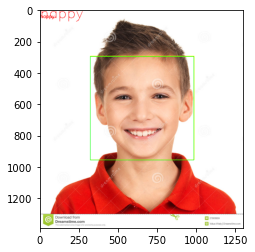

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Real time emotion detection program

In [1]:
import cv2
from deepface import DeepFace

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('CAN NOT OPEN WEBCAM')
    

while True:
    ret,frame =cap.read()
    result = DeepFace.analyze(frame , actions = ['emotion'])
    
    gray = cv2.cvtColor(frame , cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray , 1.1 , 4)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame , (x , y),(x+w , y+h),(0 , 255 , 0),2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(frame,
           result['dominant_emotion'],
           (50,50),
            font,3,
            (0,0,255),
            2,
            cv2.LINE_4
           );  
    
    cv2.imshow("live video ",frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
        
cap.release()
cv2.destroyAllwindows()

ModuleNotFoundError: ignored